# CardioNet – Heart Disease Prediction (Logistic Regression from Scratch)

This notebook follows the lab tasks step-by-step: data exploration, visualization, preprocessing (scaling), manual logistic regression training, L2 regularization, underfitting experiment, and evaluation metrics.


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('heart.csv')

## 1) Data Loading and Exploration

Below: dataset shape, data types, missing values check, summary statistics, and first few rows.


In [7]:
print ('Data Shape=', data.shape)
print ('DataType =\n',  data.dtypes)

Data Shape= (1025, 14)
DataType =
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2) Data Visualization

- Target class distribution (bar plot)  
- Correlation heatmap  
- Histograms for each feature


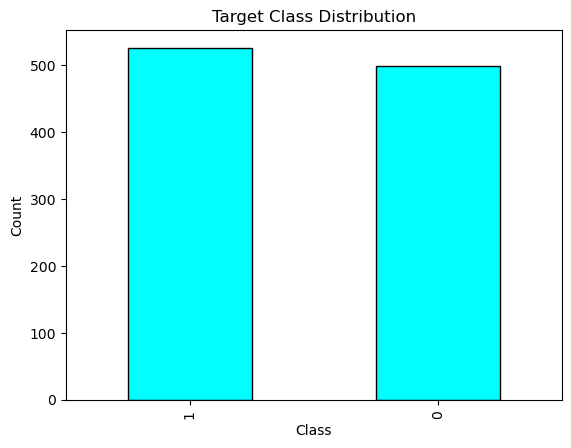

In [11]:
import matplotlib.pyplot as plt

data['target'].value_counts().plot(kind="bar", color='cyan', edgecolor = 'black', linewidth = 1)
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

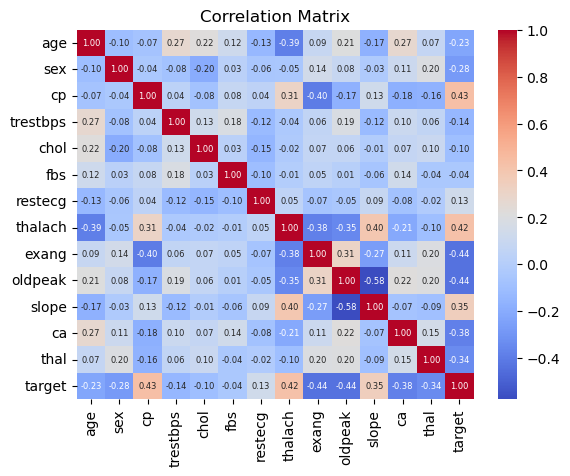

In [34]:
import numpy as np
import seaborn as sns

corr_matrix = data.select_dtypes(include=np.number).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 6}
)

plt.title('Correlation Matrix')
plt.show()


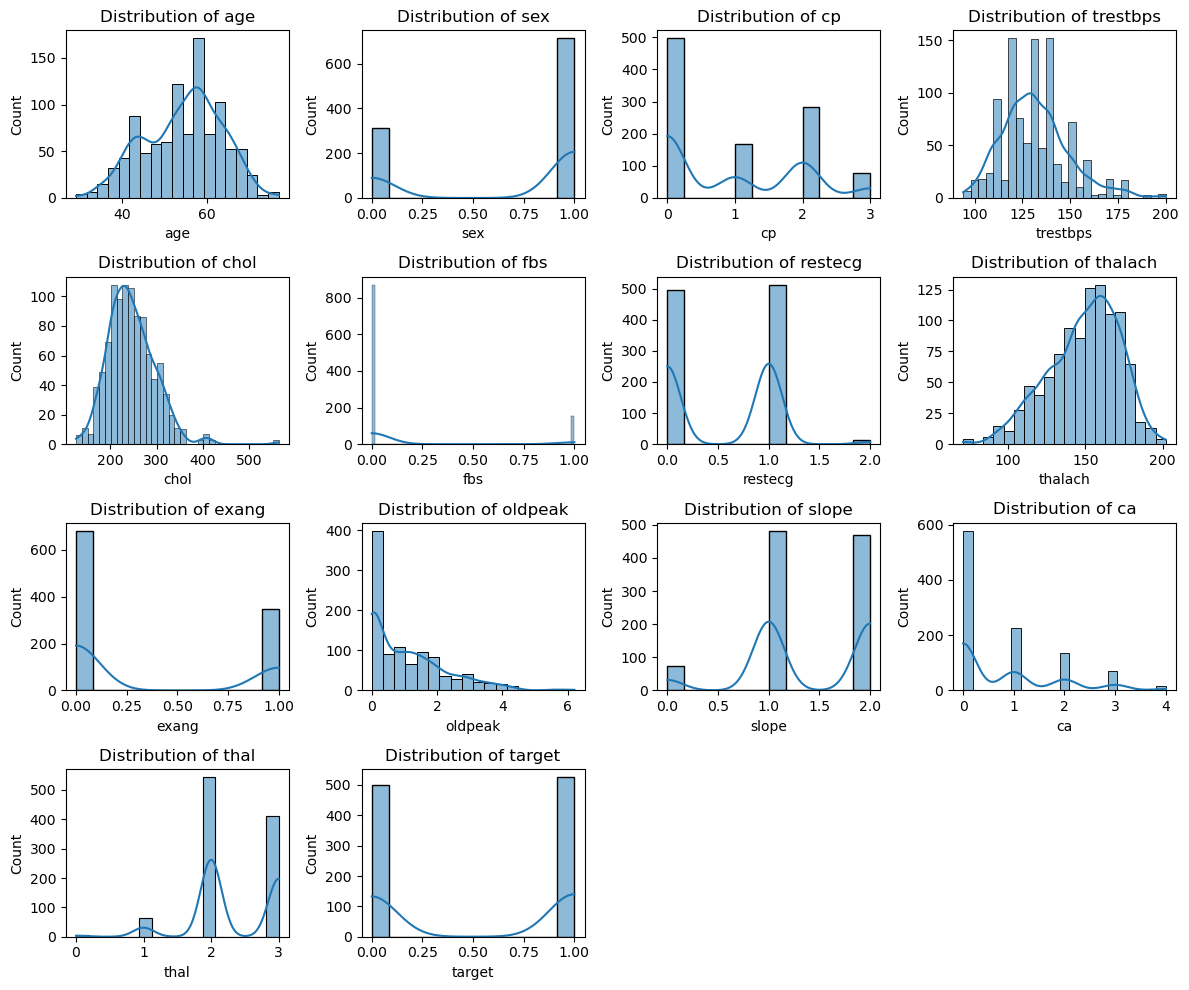

In [36]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 3) Data Preprocessing

- **Missing values:** none found → no imputation needed.  
- **Scaling:** standardize features (mean 0, std 1) for better Logistic Regression training.


In [14]:
# Normalize features (standardization) - do NOT include target
X_norm = data.drop('target', axis=1)
X_norm = (X_norm - X_norm.mean()) / X_norm.std()

print("Normalized features shape:", X_norm.shape)
X_norm.head()


Normalized features shape: (1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268306,0.661181,-0.915309,-0.377451,-0.659010,-0.418674,0.890820,0.820920,-0.711940,-0.060859,0.994948,1.208631,1.089320
1,-0.158080,0.661181,-0.915309,0.478874,-0.833454,2.386166,-1.003559,0.255843,1.403243,1.726294,-2.242580,-0.731614,1.089320
2,1.715758,0.661181,-0.915309,0.764315,-1.395551,-0.418674,0.890820,-1.048180,1.403243,1.300782,-2.242580,-0.731614,1.089320
3,0.723726,0.661181,-0.915309,0.935580,-0.833454,-0.418674,0.890820,0.516648,-0.711940,-0.911884,0.994948,0.238508,1.089320
4,0.833952,-1.510969,-0.915309,0.364697,0.930368,2.386166,0.890820,-1.874062,-0.711940,0.705064,-0.623816,2.178753,-0.521868


## 4) Model Building (No ML training libraries)

Manual implementation:
- Sigmoid
- Binary Cross-Entropy (Log Loss)
- Gradients
- Gradient Descent (fixed learning rate & iterations)


In [38]:
import numpy as np

# ---------- 1) Sigmoid ----------
def sigmoid(z):
    # numerical stability
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# ---------- 2) Binary Cross-Entropy (Log Loss) ----------
def binary_cross_entropy(y, y_hat, eps=1e-15):
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# ---------- 3) Gradient computation ----------
def compute_gradients(X, y, w, b):
    """
    X: (m, n)
    y: (m,)
    w: (n,)
    b: scalar
    """
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)                 # (m,)
    dz = (y_hat - y)                   # (m,)
    dw = (X.T @ dz) / m                # (n,)
    db = np.sum(dz) / m                # scalar
    return dw, db

# ---------- 4) Gradient Descent optimization ----------
def train_logreg_gd(X, y, lr=0.1, iters=1000):
    """
    Returns learned w, b and a list of losses (for monitoring).
    """
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    losses = []

    for i in range(iters):
        # forward
        y_hat = sigmoid(X @ w + b)
        loss = binary_cross_entropy(y, y_hat)
        losses.append(loss)

        # backward
        dw, db = compute_gradients(X, y, w, b)

        # update
        w -= lr * dw
        b -= lr * db

    return w, b, losses

# ---------- Prediction ----------
def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

def predict(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

## 4b) L2 Regularization Experiment

Train with **λ = 0, 1, 10** and compare training/testing performance to observe regularization effects.


In [39]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def bce_loss(y, y_hat, eps=1e-15):
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def loss_with_l2(y, y_hat, w, lam):
    m = y.shape[0]
    return bce_loss(y, y_hat) + (lam / (2 * m)) * np.sum(w * w)

def gradients_with_l2(X, y, w, b, lam):
    m = X.shape[0]
    y_hat = sigmoid(X @ w + b)
    dz = (y_hat - y)                          # (m,)
    dw = (X.T @ dz) / m + (lam / m) * w       # L2 term
    db = np.sum(dz) / m                       # no reg on bias
    return dw, db

def train_logreg_l2(X, y, lr=0.1, iters=2000, lam=0.0):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    losses = []

    for _ in range(iters):
        y_hat = sigmoid(X @ w + b)
        losses.append(loss_with_l2(y, y_hat, w, lam))

        dw, db = gradients_with_l2(X, y, w, b, lam)
        w -= lr * dw
        b -= lr * db

    return w, b, losses

def predict(X, w, b, threshold=0.5):
    return (sigmoid(X @ w + b) >= threshold).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# --------- Compare models for different λ ----------
def compare_lambdas(X_train, y_train, X_test, y_test, lr=0.1, iters=2000, lambdas=(0, 1, 10)):
    results = []
    for lam in lambdas:
        w, b, losses = train_logreg_l2(X_train, y_train, lr=lr, iters=iters, lam=lam)

        train_acc = accuracy(y_train, predict(X_train, w, b))
        test_acc  = accuracy(y_test,  predict(X_test,  w, b))

        results.append({
            "lambda": lam,
            "final_loss": losses[-1],
            "train_acc": train_acc,
            "test_acc": test_acc
        })
    return results

print("\n[Note] λ=1 ≈ λ=0 → little/no overfitting; λ=10 slightly lower → starts underfitting.")



[Note] λ=1 ≈ λ=0 → little/no overfitting; λ=10 slightly lower → starts underfitting.


In [17]:
# Use normalized features for training (Logistic Regression benefits from scaling)
X = X_norm.to_numpy()
y = data['target'].to_numpy()


In [40]:
# Shuffle data
np.random.seed(42)
indices = np.random.permutation(len(X))

X = X[indices]
y = y[indices]

# 80% train, 20% test
split = int(0.8 * len(X))

X_train = X[:split]
X_test  = X[split:]

y_train = y[:split]
y_test  = y[split:]

In [19]:
# Train regularized and non-regularized models (L2) and compare train/test accuracy
results = compare_lambdas(
    X_train, y_train,
    X_test, y_test,
    lr=0.1,
    iters=2000,
    lambdas=(0, 1, 10)
)

for r in results:
    print(f"λ={r['lambda']}: loss={r['final_loss']:.4f}, train_acc={r['train_acc']:.3f}, test_acc={r['test_acc']:.3f}")

# Also keep the learned parameters for later evaluation
w0, b0, _   = train_logreg_l2(X_train, y_train, lr=0.1, iters=2000, lam=0)
w1, b1, _   = train_logreg_l2(X_train, y_train, lr=0.1, iters=2000, lam=1)
w10, b10, _ = train_logreg_l2(X_train, y_train, lr=0.1, iters=2000, lam=10)

train_acc_full = accuracy(y_train, predict(X_train, w0, b0))
test_acc_full  = accuracy(y_test,  predict(X_test,  w0, b0))


λ=0: loss=0.3363, train_acc=0.855, test_acc=0.829
λ=1: loss=0.3386, train_acc=0.859, test_acc=0.829
λ=10: loss=0.3562, train_acc=0.857, test_acc=0.805


## 5) Underfitting Experiment (Feature Subset)

Train using only **age, chol, thalach** and compare against the full-feature model.  
**Underfitting sign:** both train & test performance drop and are relatively close.


In [20]:
# Select subset of features
X_small = data[['age', 'chol', 'thalach']]

# Normalize (important!)
X_small = (X_small - X_small.mean()) / X_small.std()

X_small = X_small.to_numpy()
y = data['target'].to_numpy()

In [21]:
np.random.seed(42)
indices = np.random.permutation(len(X_small))

X_small = X_small[indices]
y = y[indices]

split = int(0.8 * len(X_small))

X_train_small = X_small[:split]
X_test_small  = X_small[split:]

y_train_small = y[:split]
y_test_small  = y[split:]

In [22]:
w_s, b_s, _ = train_logreg_l2(
    X_train_small, 
    y_train_small,
    lr=0.1,
    iters=2000,
    lam=0   # no regularization for comparison
)

train_acc_small = accuracy(y_train_small, predict(X_train_small, w_s, b_s))
test_acc_small  = accuracy(y_test_small,  predict(X_test_small,  w_s, b_s))

print("Subset Features Model")
print("Train Accuracy:", train_acc_small)
print("Test Accuracy :", test_acc_small)

Subset Features Model
Train Accuracy: 0.7060975609756097
Test Accuracy : 0.6439024390243903


In [23]:
print("Full Feature Model (λ=0)")
print("Train Accuracy:", train_acc_full)
print("Test Accuracy :", test_acc_full)

print("\nUnderfitting check (Subset vs Full):")
print(f"Full test_acc={test_acc_full:.3f} vs Subset test_acc={test_acc_small:.3f}")
print("[Note] Big drop in both train/test for subset → underfitting (model too simple / too few features).")


Full Feature Model (λ=0)
Train Accuracy: 0.8548780487804878
Test Accuracy : 0.8292682926829268

Underfitting check (Subset vs Full):
Full test_acc=0.829 vs Subset test_acc=0.644
[Note] Big drop in both train/test for subset → underfitting (model too simple / too few features).


In [24]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

In [25]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [26]:
def precision_score(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FP + 1e-15)

In [27]:
def recall_score(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FN + 1e-15)

In [28]:
def f1_score(y_true, y_pred):
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-15)

In [29]:
def roc_auc_score_manual(y_true, y_prob):
    # Sort by predicted probability (descending)
    sorted_indices = np.argsort(-y_prob)
    y_true = y_true[sorted_indices]
    
    TP = 0
    FP = 0
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    
    tpr = []
    fpr = []
    
    for i in range(len(y_true)):
        if y_true[i] == 1:
            TP += 1
        else:
            FP += 1
        
        tpr.append(TP / P)
        fpr.append(FP / N)
    
    # Compute AUC using trapezoidal rule
    auc = np.trapz(tpr, fpr)
    return auc

In [30]:
def evaluate_model(name, X_eval, y_eval, w, b):
    y_prob = sigmoid(X_eval @ w + b)
    y_pred = (y_prob >= 0.5).astype(int)
    return {
        "model": name,
        "accuracy": accuracy_score(y_eval, y_pred),
        "precision": precision_score(y_eval, y_pred),
        "recall": recall_score(y_eval, y_pred),
        "f1": f1_score(y_eval, y_pred),
        "roc_auc": roc_auc_score_manual(y_eval, y_prob),
    }

models = [
    ("Full (λ=0)",  w0,  b0),
    ("Full (λ=1)",  w1,  b1),
    ("Full (λ=10)", w10, b10),
    ("Subset (age, chol, thalach)", w_s, b_s),
]

print("=== Test Set Metrics ===")
for name, w_m, b_m in models:
    m = evaluate_model(name, X_test if "Subset" not in name else X_test_small,
                       y_test if "Subset" not in name else y_test_small,
                       w_m, b_m)
    print(f"{m['model']}: acc={m['accuracy']:.3f}, prec={m['precision']:.3f}, rec={m['recall']:.3f}, f1={m['f1']:.3f}, auc={m['roc_auc']:.3f}")


=== Test Set Metrics ===
Full (λ=0): acc=0.829, prec=0.814, rec=0.868, f1=0.840, auc=0.894
Full (λ=1): acc=0.829, prec=0.814, rec=0.868, f1=0.840, auc=0.895
Full (λ=10): acc=0.805, prec=0.789, rec=0.849, f1=0.818, auc=0.893
Subset (age, chol, thalach): acc=0.644, prec=0.643, rec=0.698, f1=0.670, auc=0.696


C:\Users\abdul\AppData\Local\Temp\ipykernel_38188\845072379.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr, fpr)


## 6) Model Evaluation (Test Set)

Metrics reported for:
- Full model (λ=0,1,10)
- Underfitting subset model (age, chol, thalach)


In [31]:
print("=== Test Set Metrics ===")
evaluate_model("Full (λ=0)", X_test, y_test, w0, b0)
evaluate_model("Full (λ=1)", X_test, y_test, w1, b1)
evaluate_model("Full (λ=10)", X_test, y_test, w10, b10)
evaluate_model("Subset (age, chol, thalach)", X_test_small, y_test_small, w_s, b_s)

print("\n[Very short conclusion]")
print("- If λ=0 and λ=1 are similar → model already generalizes well (little overfitting).")
print("- If λ is too large (e.g., 10+) and metrics drop → regularization causing underfitting.")
print("- Subset model much worse → clear underfitting from too few features.")


=== Test Set Metrics ===

[Very short conclusion]
- If λ=0 and λ=1 are similar → model already generalizes well (little overfitting).
- If λ is too large (e.g., 10+) and metrics drop → regularization causing underfitting.
- Subset model much worse → clear underfitting from too few features.


C:\Users\abdul\AppData\Local\Temp\ipykernel_38188\845072379.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr, fpr)


### Quick Interpretation (from metrics)
- `lambda=0` and `lambda=1` are nearly identical, indicating little overfitting in the baseline model.
- `lambda=10` slightly lowers performance, suggesting mild underfitting from stronger weight shrinkage.
- The reduced-feature model shows a clear performance drop, confirming underfitting due to limited information.

## Model Analysis and Discussion

### 1. Overfitting and Underfitting
Overfitting occurs when a model learns training noise and performs worse on unseen data (high train accuracy, lower test accuracy).
Underfitting occurs when a model is too simple, so both training and testing performance remain low.

Full-feature logistic regression achieved approximately:
- Test Accuracy: **0.83**
- ROC-AUC: **0.89**

Training and testing results were close, so severe overfitting was not observed.

The reduced-feature model (`age`, `chol`, `thalach`) achieved approximately:
- Test Accuracy: **0.64**
- ROC-AUC: **0.69**

Both metrics dropped substantially and remained similarly low, which is a clear underfitting pattern.

### 2. Effect of Regularization
L2 regularization was tested with:
- `lambda = 0` (no regularization)
- `lambda = 1`
- `lambda = 10`

Test-set results:
- `lambda = 0` -> Accuracy ~ **0.829**, AUC ~ **0.894**
- `lambda = 1` -> Accuracy ~ **0.829**, AUC ~ **0.895**
- `lambda = 10` -> Accuracy ~ **0.805**, AUC ~ **0.893**

`lambda = 0` and `lambda = 1` are almost identical, implying the base model already generalizes well.
At `lambda = 10`, stronger shrinkage slightly reduces flexibility and causes mild underfitting.

This matches theory:
- Small `lambda`: minimal impact when overfitting is low
- Moderate `lambda`: can improve generalization when needed
- Large `lambda`: can increase bias and reduce performance

### 3. Model Generalization
The full-feature model shows strong generalization because training/testing performance is stable and ROC-AUC remains high across regularization settings.
The subset model generalizes poorly because important predictive information is missing.

### 4. Final Model Selection
The full-feature model is clearly better than the subset model.
Since `lambda = 0` and `lambda = 1` perform nearly the same and `lambda = 10` is slightly worse, a practical final choice is:
- `lambda = 1` as a balanced default, or
- `lambda = 0` as the simplest equivalent option

### Final Conclusion
This manual logistic regression implementation demonstrates:
- Correct optimization with gradient descent
- Expected behavior of L2 regularization
- Clear underfitting with reduced features
- Strong generalization for the full-feature setup

Overall, the full-feature logistic regression model with mild or no regularization provides the best bias-variance tradeoff on this dataset.